### Importação dos dados



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()



,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [5]:
lojas = {
    'loja1': loja1,
    'loja2': loja2,
    'loja3': loja3,
    'loja4': loja4
}

for nome_loja, dados_loja in lojas.items():
    faturamento_por_loja = (dados_loja['Preço'] + dados_loja['Frete']).sum()
    print(f'Fatumanento da {nome_loja}: {faturamento_por_loja:.2f}')


Fatumanento da loja1: 1616347.09
Fatumanento da loja2: 1567773.22
Fatumanento da loja3: 1542047.69
Fatumanento da loja4: 1458253.46


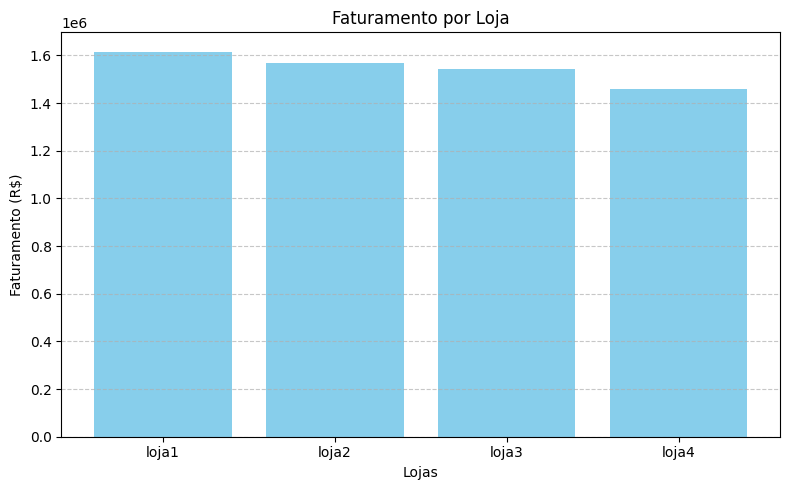

In [16]:

plt.figure(figsize=(8, 5))
nomes_lojas = []
faturamentos = []

for nome_loja, dados_loja in lojas.items():
    faturamento_por_loja = (dados_loja['Preço'] + dados_loja['Frete']).sum()
    nomes_lojas.append(nome_loja)
    faturamentos.append(faturamento_por_loja)

plt.bar(nomes_lojas, faturamentos, color='skyblue')

plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [15]:
for nome_loja, dados_loja in lojas.items():
    vendas_categorias = dados_loja['Categoria do Produto'].value_counts()
    print(f'Categorias mais vendidas na {nome_loja}: \n {vendas_categorias} \n')

Categorias mais vendidas na loja1: 
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64 

Categorias mais vendidas na loja2: 
 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64 

Categorias mais vendidas na loja3: 
 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64 

Categorias mais vendidas na loja4: 
 Categoria

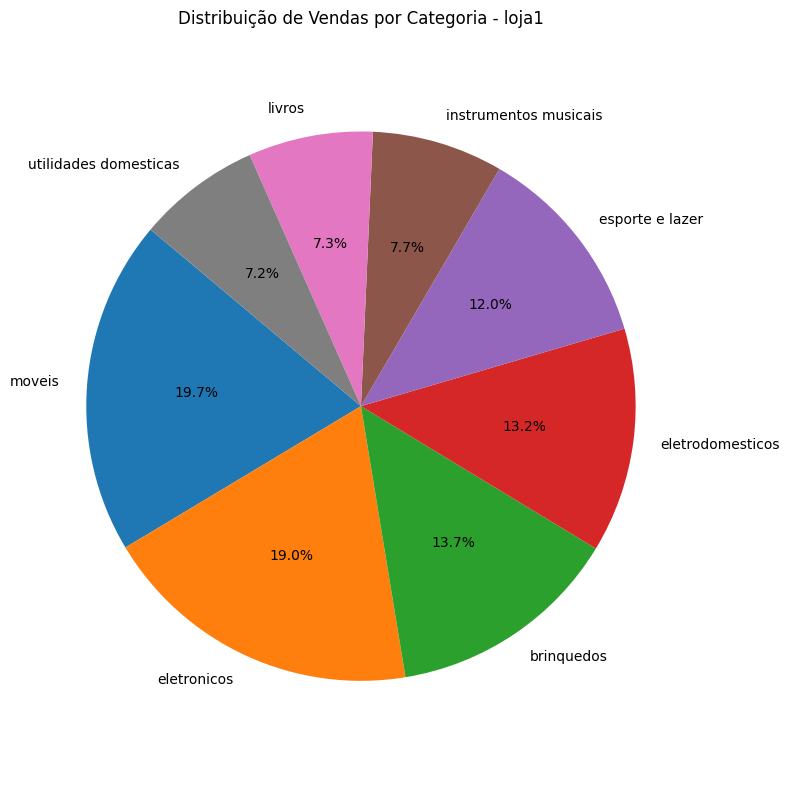

Categorias mais vendidas na loja1: 
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64 



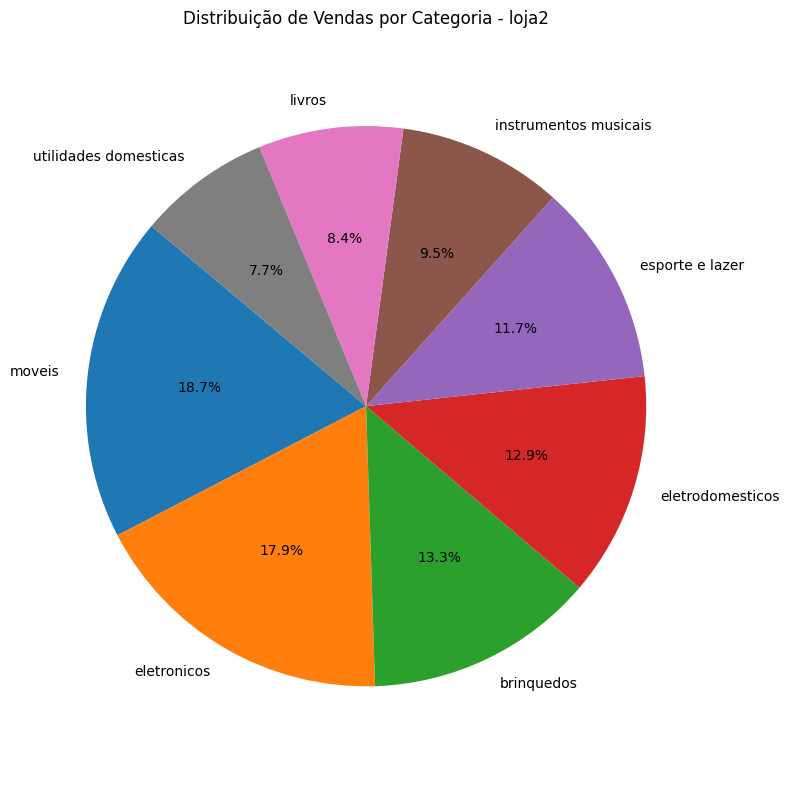

Categorias mais vendidas na loja2: 
 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64 



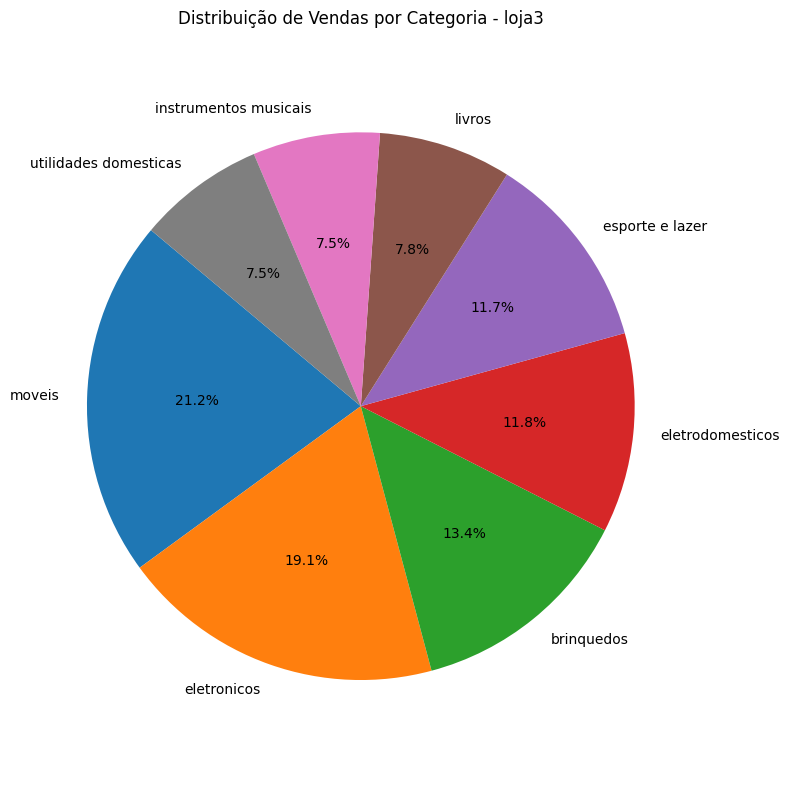

Categorias mais vendidas na loja3: 
 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64 



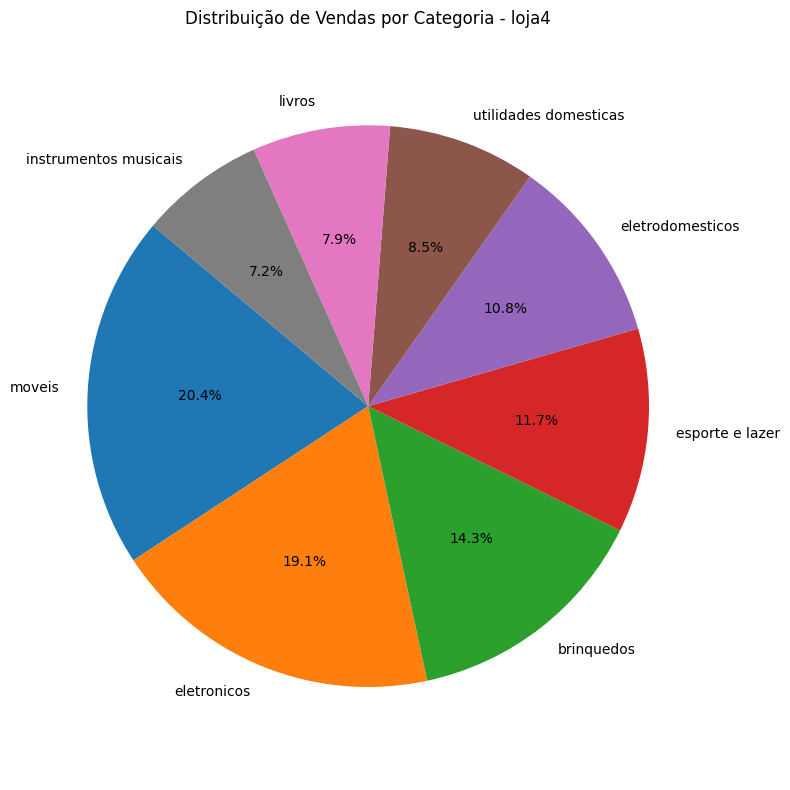

Categorias mais vendidas na loja4: 
 Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos         254
utilidades domesticas    201
livros                   187
instrumentos musicais    170
Name: count, dtype: int64 



In [17]:
for nome_loja, dados_loja in lojas.items():
    vendas_categorias = dados_loja['Categoria do Produto'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(vendas_categorias, labels=vendas_categorias.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribuição de Vendas por Categoria - {nome_loja}')
    plt.axis('equal')  # Garante que o gráfico de pizza seja um círculo.
    plt.tight_layout()
    plt.show()

    print(f'Categorias mais vendidas na {nome_loja}: \n {vendas_categorias} \n')

# 3. Média de Avaliação das Lojas

In [14]:
for nome_loja, dados_loja in lojas.items():
    media_avaliacao = dados_loja['Avaliação da compra'].mean()
    print(f'Média de avaliação da {nome_loja}: {media_avaliacao:.2f}')

Média de avaliação da loja1: 3.98
Média de avaliação da loja2: 4.04
Média de avaliação da loja3: 4.05
Média de avaliação da loja4: 4.00


Média de avaliação da loja1: 3.98
Média de avaliação da loja2: 4.04
Média de avaliação da loja3: 4.05
Média de avaliação da loja4: 4.00


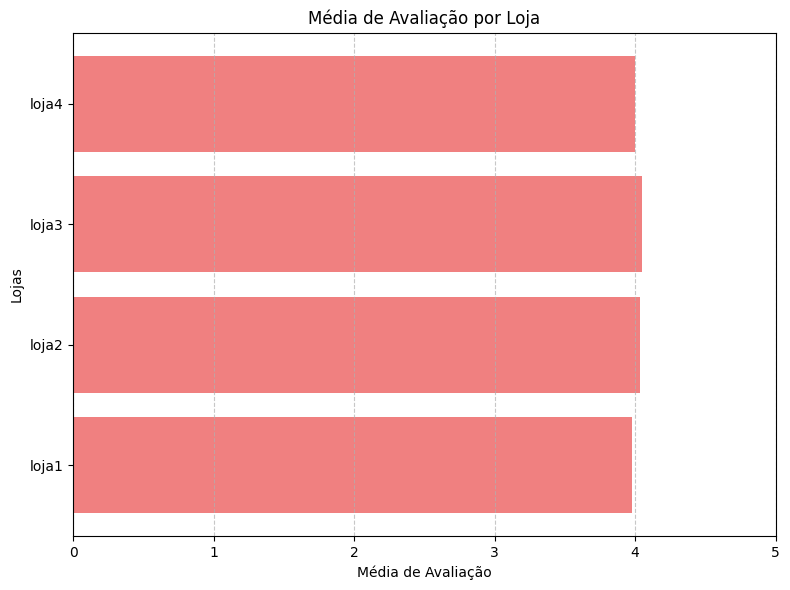

In [22]:
nomes_lojas = list(lojas.keys())
medias_avaliacoes = []

for nome_loja, dados_loja in lojas.items():
    media_avaliacao = dados_loja['Avaliação da compra'].mean()
    medias_avaliacoes.append(media_avaliacao)
    print(f'Média de avaliação da {nome_loja}: {media_avaliacao:.2f}')

plt.figure(figsize=(8, 6))
plt.barh(nomes_lojas, medias_avaliacoes, color='lightcoral')

plt.title('Média de Avaliação por Loja')
plt.xlabel('Média de Avaliação')
plt.ylabel('Lojas')
plt.xlim(0, 5)  # Assumindo que a avaliação é em uma escala de 0 a 5
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [13]:
for nome_loja, dados_loja in lojas.items():
    vendas_produtos = dados_loja['Produto'].value_counts()
    print(f'Produtos mais vendidas na {nome_loja}: \n {vendas_produtos} \n')

Produtos mais vendidas na loja1: 
 Produto
Micro-ondas                    60
TV Led UHD 4K                  60
Guarda roupas                  60
Secadora de roupas             58
Cômoda                         56
Blocos de montar               56
Bola de basquete               55
Bicicleta                      54
Copo térmico                   54
Geladeira                      54
Impressora                     54
Bateria                        53
Faqueiro                       52
Carrinho controle remoto       52
Modelagem preditiva            51
Fone de ouvido                 50
Xadrez de madeira              49
Celular Plus X42               49
Lava louças                    48
Lavadora de roupas             47
Guitarra                       47
Violão                         46
Sofá retrátil                  46
Cadeira de escritório          46
Fogão                          45
Cama box                       44
Kit banquetas                  44
Smart TV                       44
Cama 

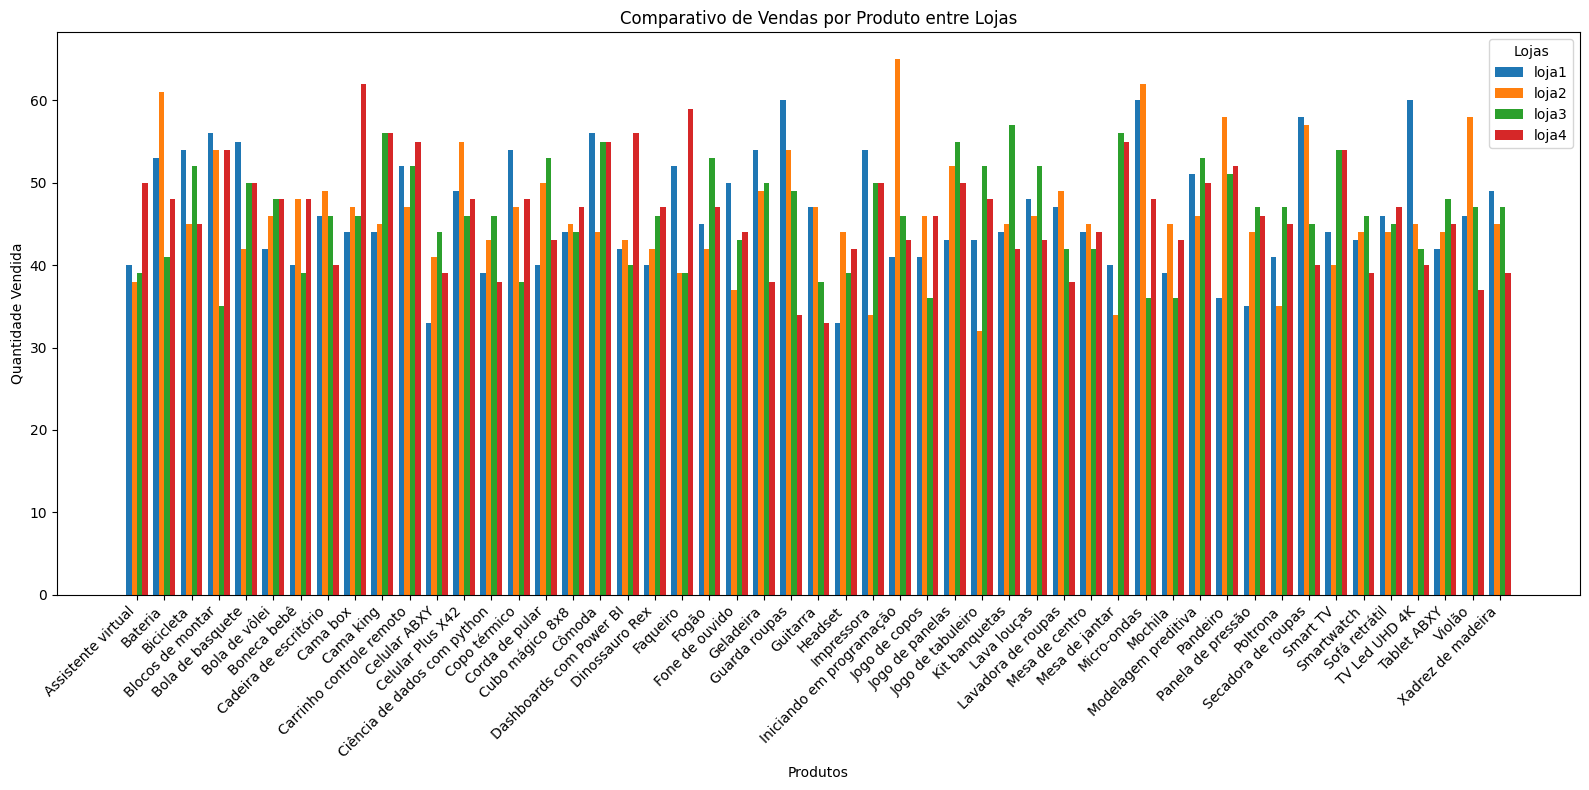

Produtos mais vendidos na loja1: 
 Produto
Micro-ondas                    60
TV Led UHD 4K                  60
Guarda roupas                  60
Secadora de roupas             58
Cômoda                         56
Blocos de montar               56
Bola de basquete               55
Bicicleta                      54
Copo térmico                   54
Geladeira                      54
Impressora                     54
Bateria                        53
Faqueiro                       52
Carrinho controle remoto       52
Modelagem preditiva            51
Fone de ouvido                 50
Xadrez de madeira              49
Celular Plus X42               49
Lava louças                    48
Lavadora de roupas             47
Guitarra                       47
Violão                         46
Sofá retrátil                  46
Cadeira de escritório          46
Fogão                          45
Cama box                       44
Kit banquetas                  44
Smart TV                       44
Cama 

In [20]:
vendas_por_produto_loja = {}

for nome_loja, dados_loja in lojas.items():
    vendas_produtos = dados_loja['Produto'].value_counts()
    vendas_por_produto_loja[nome_loja] = vendas_produtos

produtos = set()
for vendas in vendas_por_produto_loja.values():
    produtos.update(vendas.index)
produtos = sorted(list(produtos))

num_lojas = len(lojas)
largura_barra = 0.8 / num_lojas
posicoes = list(range(len(produtos)))

plt.figure(figsize=(16, 8))

for i, (nome_loja, vendas) in enumerate(vendas_por_produto_loja.items()):
    posicoes_barra = [p + i * largura_barra for p in posicoes]
    valores = [vendas.get(produto, 0) for produto in produtos]
    plt.bar(posicoes_barra, valores, largura_barra, label=nome_loja)

plt.xlabel('Produtos')
plt.ylabel('Quantidade Vendida')
plt.title('Comparativo de Vendas por Produto entre Lojas')
plt.xticks([p + (largura_barra * (num_lojas - 1)) / 2 for p in posicoes], produtos, rotation=45, ha='right')
plt.legend(title='Lojas')
plt.tight_layout()
plt.show()

for nome_loja, dados_loja in lojas.items():
    vendas_produtos = dados_loja['Produto'].value_counts()
    print(f'Produtos mais vendidos na {nome_loja}: \n {vendas_produtos} \n')

# 5. Frete Médio por Loja


In [12]:
for nome_loja, dados_loja in lojas.items():
    media_frete = dados_loja['Frete'].mean()
    print(f'Média de frete da {nome_loja}: {media_frete:.2f}')

Média de frete da loja1: 34.69
Média de frete da loja2: 33.62
Média de frete da loja3: 33.07
Média de frete da loja4: 31.28


Média de frete da loja1: 34.69
Média de frete da loja2: 33.62
Média de frete da loja3: 33.07
Média de frete da loja4: 31.28


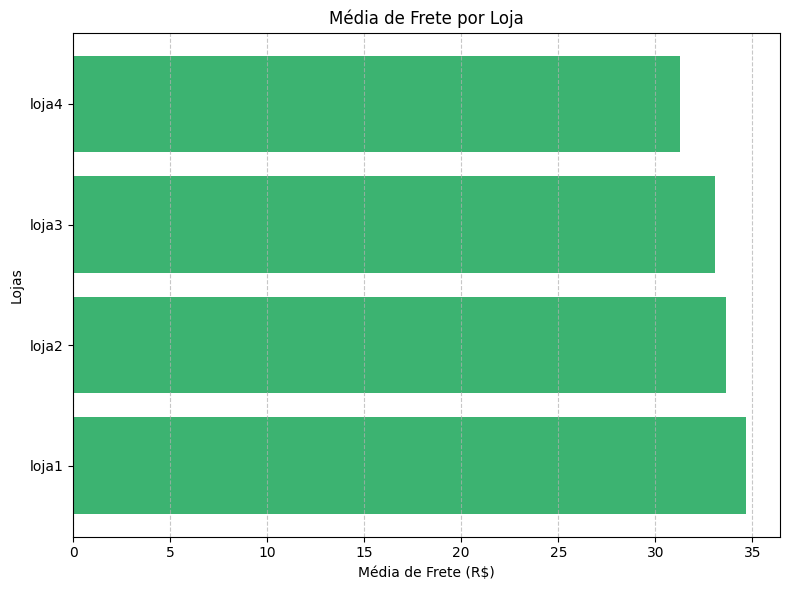

In [23]:
nomes_lojas = list(lojas.keys())
medias_fretes = []

for nome_loja, dados_loja in lojas.items():
    media_frete = dados_loja['Frete'].mean()
    medias_fretes.append(media_frete)
    print(f'Média de frete da {nome_loja}: {media_frete:.2f}')

plt.figure(figsize=(8, 6))
plt.barh(nomes_lojas, medias_fretes, color='mediumseagreen')

plt.title('Média de Frete por Loja')
plt.xlabel('Média de Frete (R$)')
plt.ylabel('Lojas')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 📊 Relatório de Análise de Desempenho das Lojas – Alura Store

**Elaborado para:** Senhor João  
**Objetivo:** Identificar a loja menos eficiente da rede Alura Store, a fim de ser vendida e permitir o início de um novo empreendimento.

---

## 🔍 Visão Geral

Foi realizada uma análise comparativa entre as quatro lojas da Alura Store com base nos seguintes critérios:

- Faturamento total  
- Avaliação média dos clientes  
- Frete médio  
- Volume de vendas por categoria e produto

---

## 📈 Comparativo de Desempenho

| Indicador                    | Loja 1       | Loja 2       | Loja 3       | Loja 4       |
|-----------------------------|--------------|--------------|--------------|--------------|
| **Faturamento Total**       |  1.616.347 |  1.567.773 |  1.542.048 | **1.458.253** |
| **Avaliação Média**         | 3,98         | 4,04         | 4,05         | **4,00**     |
| **Frete Médio**             |  34,69     |  33,62     |  33,07     | **31,28** |
| **Categorias mais vendidas** | Móveis, Eletrônicos, Brinquedos | Móveis, Eletrônicos, Brinquedos | Móveis, Eletrônicos, Brinquedos | Móveis, Eletrônicos, Brinquedos |
| **Produtos em Destaque**    | Micro-ondas, TV, Guarda-roupas | Programação, Micro-ondas, Bateria | Kit Banquetas, Mesa, Cama King | Cama box, Faqueiro, Power BI |

---

## ❌ Pontos Fracos da Loja 4

1. **Menor Faturamento Total**  
   A Loja 4 apresentou o pior desempenho em vendas, com faturamento significativamente inferior às demais.

2. **Avaliação Abaixo da Média**  
   Sua avaliação média de 4,00 é inferior às Lojas 2 (4,04) e 3 (4,05), o que pode indicar menor satisfação do cliente.

3. **Baixo Volume de Produtos Vendidos em Diversas Categorias**  
   Apesar de vender os mesmos tipos de produtos que outras lojas, seu volume de vendas por item é geralmente inferior.

4. **Frete Mais Barato Não Impulsionou Vendas**  
   Mesmo com o menor frete médio, essa vantagem não refletiu em aumento de vendas ou melhor faturamento.

---

## ✅ Recomendação Final

📌 **Venda da Loja 4**

Com base na análise dos dados, a **Loja 4** é a **menos eficiente da rede Alura Store**. Sua performance inferior em faturamento, avaliações e volume de vendas torna-a a melhor candidata para ser vendida.
